In [1]:
import pandas as pd
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions

df = project_functions.load_and_process('../../data/raw/mlb_elo.csv')

df.to_csv(r'../../data/processed/mlb_game_data.csv')
lists = project_functions.variables()

In [2]:
dft = df
current_home_df = df[(df["home_team"].isin(lists["current_teams"]))]
current_away_df = df[(df["away_team"].isin(lists["current_teams"]))]

current_home_df.to_csv(r'../../data/processed/mlb_home_elo.csv')
current_away_df.to_csv(r'../../data/processed/mlb_away_elo.csv')

In [3]:
#all world series games in sorted by winning teams pitcher1 from worst to best

df3 = df[(df["playoff"] == "w") ]
df4 = df3.drop(["neutral", "home_prob", "away_prob", "home_post", "away_post", "home_pre", "away_pre"], axis="columns")
df4 = df4[(df4["home_pitcher_rating"] != "s") ]


# subtract away score from home score to find winner if positive home = winner
# subtrract away pitcher2_adj from pitcher1_adj to find better pitcher

score = df4["home_score"] - df4["away_score"]

df4["compare_score"] = score

#need to drop home_pitcher_rating & away_pitcher_rating with "s"

df4 = df4[(df4["home_pitcher_rating"] != "s") ]
comp_pitcher = df4["home_pitcher_rating"] - df4["away_pitcher_rating"]

df4["compare_pitchers"] = comp_pitcher

df4["home_win"] = np.where(df4["compare_score"] > 0, True, False)
df4["away_win"] = np.where(df4["compare_score"] < 0, True, False)

win_pitch = np.where(df4["home_win"] == True, (df4["home_pitcher_rating"]), (df4["away_pitcher_rating"]))
df4["win_pitch_adj"] = win_pitch

#make function to compare winner of game with differnce in pitcher ratings
df4["pitcher_difference"] = np.where(df4["home_win"] == True, (df4["compare_pitchers"]), (df4["compare_pitchers"] * -1))

# sort win_difference by smallest to largest

df4.to_csv(r'../../data/processed/ws_pitcher_adj.csv')


print(df4)


              date  season playoff home_team away_team    home_pitcher  \
0       10/27/2020    2020       w       LAD       TBD   Tony Gonsolin   
1       10/25/2020    2020       w       TBD       LAD   Tyler Glasnow   
2       10/24/2020    2020       w       TBD       LAD  Ryan Yarbrough   
3       10/23/2020    2020       w       TBD       LAD  Charlie Morton   
4       10/21/2020    2020       w       LAD       TBD   Tony Gonsolin   
...            ...     ...     ...       ...       ...             ...   
185307  10/11/1913    1913       w       SFG       OAK        mathc102   
185308  10/10/1913    1913       w       OAK       SFG        bendc101   
185309   10/9/1913    1913       w       SFG       OAK        tesrj101   
185310   10/8/1913    1913       w       OAK       SFG        plane101   
185311   10/7/1913    1913       w       SFG       OAK        marqr102   

           away_pitcher home_pitcher_rgs away_pitcher_rgs home_pitcher_rating  \
0           Blake Snell       

# Describing the dataset

- Who
- What
- Where
- When
- How
- Why

In [4]:
# df.describe(include='all')
#df4.describe("win_pitch_adj")

## First Things First

### Let's isolate the data to only include world series games

>When doing this the Home and away starting pitcher's adjustment to their team's rating before 1913 were not tracked so that data will removed

>we will narrow down the selected games using the above criteria with the following code

### This code is used earlier but just shown now

df3 = df[(df["playoff"] == "w") ]  
df4 = df4.drop(["neutral", "home_prob", "away_prob", "home_post", "away_post", "home_pre", "away_pre"], axis="columns")  
df4 = df4[(df4["home_pitcher_rating"] != "s") ] 

print(df4)



## Part 2

> Here we will show the average pitcher's adjustment to the team rating for those that won the game. A positive number means that the pitcher provides a boost to their team, while a negativ number indicates their team has to overcome some bad pitching to win


In [5]:
dfj = df4.sort_values(by="win_pitch_adj", ascending = True)
print (dfj)


             date  season playoff home_team away_team       home_pitcher  \
30524  10/28/2007    2007       w       COL       BOS           cooka002   
954    10/26/2019    2019       w       WSN       HOU     Patrick Corbin   
52676  10/21/1998    1998       w       SDP       NYY           browk001   
13280  10/25/2014    2014       w       SFG       KCR     Ryan Vogelsong   
15742  10/26/2013    2013       w       STL       BOS          Joe Kelly   
...           ...     ...     ...       ...       ...                ...   
25606   11/1/2009    2009       w       PHI       NYY        Joe Blanton   
13279  10/26/2014    2014       w       SFG       KCR  Madison Bumgarner   
5886   10/25/2017    2017       w       LAD       HOU          Rich Hill   
953    10/27/2019    2019       w       WSN       HOU           Joe Ross   
3421   10/23/2018    2018       w       BOS       LAD         Chris Sale   

           away_pitcher home_pitcher_rgs away_pitcher_rgs home_pitcher_rating  \
30524 

home pitcher Aaron 
Jon Lester beats

Text(0.5, 1.0, "Winning Picher's adjuested rating histogram")

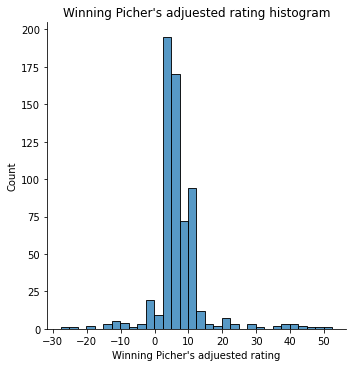

In [4]:
sns.displot(df4, x="win_pitch_adj", binwidth = 2.5)
plt.xlabel ("Winning Picher's adjuested rating")
plt.title ("Winning Picher's adjuested rating histogram")


>as you can see the majority of the teams to win have pitchers who have a positive impact on their team
>we are not interested in those pitchers, we want to find the worst adjusted pitcher rating to win a World series game. That dot is way in the bottom left
>next we will show the biggest difference bewteen the starting pitchers adjustment to their team and find which overcame the biggest gap to win

<Figure size 1080x1008 with 0 Axes>

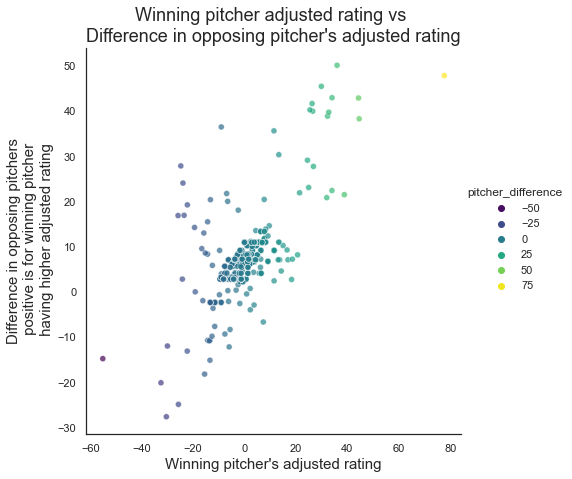

In [5]:
plt.figure(figsize=(15,14))
sns.set_theme(style="white")

# adj_comp = df4.eval("win_pitch_adj / pitcher_difference").rename(adj_comp)


sp = sns.color_palette("viridis", as_cmap=True)



#'#008080'
sns.relplot(x="pitcher_difference", y="win_pitch_adj",
            sizes=400, alpha=.7, palette=sp, hue = "pitcher_difference",
            height=6, data=df4)

plt.xlabel("Winning pitcher's adjusted rating", size=15)
plt.ylabel("Difference in opposing pitchers\n positive is for winning pitcher\n having higher adjusted rating", size=15)
plt.title("Winning pitcher adjusted rating vs \nDifference in opposing pitcher's adjusted rating", size=18)

plt.show()



Text(0.5, 1.0, 'Opposing pitchers differnce in Adjusted ratings')

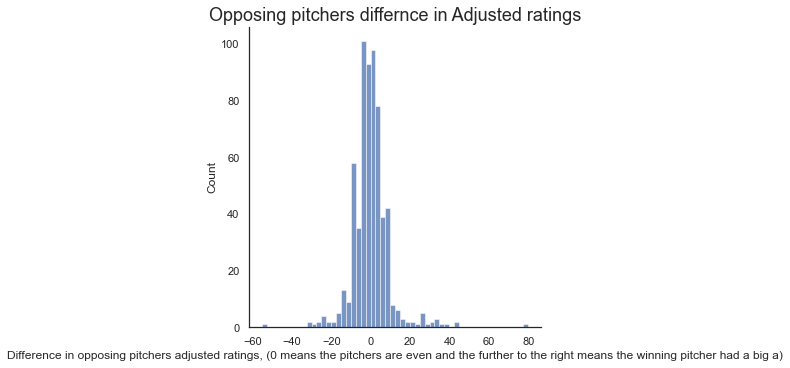

In [6]:
sns.displot(df4, x="pitcher_difference", binwidth = 2.5)
plt.xlabel ("Difference in opposing pitchers adjusted ratings, (0 means the pitchers are even and the further to the right means the winning pitcher had a big a)")
plt.title("Opposing pitchers differnce in Adjusted ratings", size=18)


## Now this is getting a little more intersting

as you can see the majority have an advantage in their pitchers adjustment to their team vs the opponents pitcher. The top right has teams with great pitching vs opponents whose pitching puts them at a disadvantage so it's no surprise that the majority of these are above 0 in pitcher difference.
Once again those guys are the norm and not that interesting, the more intersting cases are the ones furthest to bottom left. The furthest left is the biggesest penalty in adjusted pitcher ratings to win a World Series Game.

> Using the following code we can sort by that difference to find that game

In [7]:
df5 = df4.sort_values(by="pitcher_difference", ascending = True)
df5 = df5.drop(["compare_pitchers", "playoff"], axis="columns")


print(df5)

df5 = df5.sort_values(by="pitcher_difference", ascending = False)

df5.to_csv(r'../../data/processed/ws_pitcher_adj_difference.csv')

# print(df5)


             date  season home_team away_team    home_pitcher  \
18211  10/24/2012    2012       SFG       DET      Barry Zito   
52676  10/21/1998    1998       SDP       NYY        browk001   
30524  10/28/2007    2007       COL       BOS        cooka002   
8353   10/28/2016    2016       CHC       CLE  Kyle Hendricks   
5882   10/31/2017    2017       LAD       HOU       Rich Hill   
...           ...     ...       ...       ...             ...   
3421   10/23/2018    2018       BOS       LAD      Chris Sale   
8351   10/30/2016    2016       CHC       CLE      Jon Lester   
25606   11/1/2009    2009       PHI       NYY     Joe Blanton   
8352   10/29/2016    2016       CHC       CLE     John Lackey   
953    10/27/2019    2019       WSN       HOU        Joe Ross   

           away_pitcher home_pitcher_rgs away_pitcher_rgs home_pitcher_rating  \
18211  Justin Verlander           47.441           63.458             -14.777   
52676     Andy Pettitte           66.540           50.927